# Neural networks: predict

CPSC 340: Machine Learning and Data Mining

2018 Winter Term 1

By Mike Gelbart (converted to Julia by Jason Chau)

In [30]:
using PyCall,PyPlot
plt = pyimport("matplotlib.pyplot")
using Random
SkNeural = pyimport("sklearn.neural_network")

PyObject <module 'sklearn.neural_network' from 'C:\\Users\\jasonsyc.STUDENTS.000\\.julia\\conda\\3\\lib\\site-packages\\sklearn\\neural_network\\__init__.py'>

## Back to supervised learning

Consider 1-D regression...

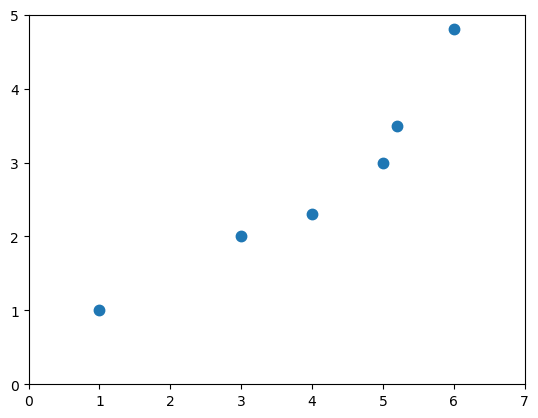

(0, 5)

In [7]:
x = [1,3,4,  5,5.2,6]
y = [1,2,2.3,3,3.5,4.8]
function plot_pts(x,y)
    plt.plot(x,y, ".", markersize=15)
    plt.xlim([0, 7])
    plt.ylim([0, 5])
end
plot_pts(x,y)

Consider various fits... 

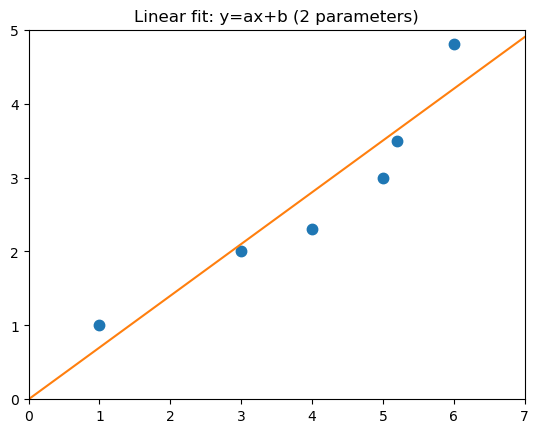

In [9]:
plot_pts(x,y)
grid = range(0,stop=7,length=100)
plt.plot(grid,0.7.*grid)
plt.title("Linear fit: y=ax+b (2 parameters)");

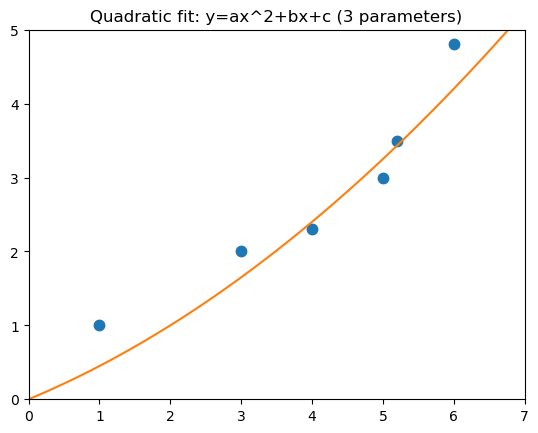

In [10]:
plot_pts(x,y)
plt.plot(grid,0.4.*grid+0.05.*grid.^2)
plt.title("Quadratic fit: y=ax^2+bx+c (3 parameters)");

We can fit various functions from the _polynomial family_. But each polynomial **has a different number of parameters**. Note that the polynomial family always maps from $\mathbb{R}^d\rightarrow \mathbb{R}$.

- Model: has parameters that we fit
- Family: a set of models that are linked by some theme, but may have different numbers of parameters
- **"Neural network" is a family of functions just like this.**
  - The class includes linear functions like we saw above, but also insanely nonlinear ones.


#### Formal definition

$$ z^{(l+1)} = f\left( W^{(l)} z^{(l)} + b^{(l)}\right) $$

where $W^{(l)}$ is a matrix of parameters, $b^{(l)}$ is a vector of parameters, $f(\cdot)$ is an elementwise nonlinearity, $l=0,\ldots,L$ where $L$ is the number of "hidden layers", $z^{(0)}=x$, and $z^{(L)}=y$. 

In [13]:
function example_1_layer_nn(x,W,f) # x is a vector, W is a matrix
    return f(W*x)
end

x = rand(5)
W = rand(2,5)
f(x) = 1 ./(1 .+broadcast(exp,-x))

f (generic function with 1 method)

In [14]:
x

5-element Array{Float64,1}:
 0.9157297476037178
 0.7337367668979993
 0.9969456860128165
 0.4172460109822467
 0.9353576574466758

In [15]:
W

2×5 Array{Float64,2}:
 0.546711  0.983584   0.698272  0.3275    0.0871148
 0.945891  0.0580299  0.818601  0.617023  0.669145 

In [16]:
example_1_layer_nn(x,W,f)

2-element Array{Float64,1}:
 0.8944101490628004
 0.9313874303096188

- Above: the size of the input is 5 and the size of the output is 2.
- Below: the size of the input is 5 and the size of the output is 1.

In [18]:
function example_nn(x,W,f) # x is a vector, W is a _list of matrices_
    for W_l in W
        x = f(W_l*x)
    end
    return x
end

x = rand(5)
W1 = rand(2,5)
W2 = rand(1,2)
example_nn(x, [W1,W2], f)

1-element Array{Float64,1}:
 0.6737636108088411

- Regression: end with the prediction (output has $1$ dimension)
- Classification: end with a softmax (output has $c$ dimensions)

#### 1D neural net example

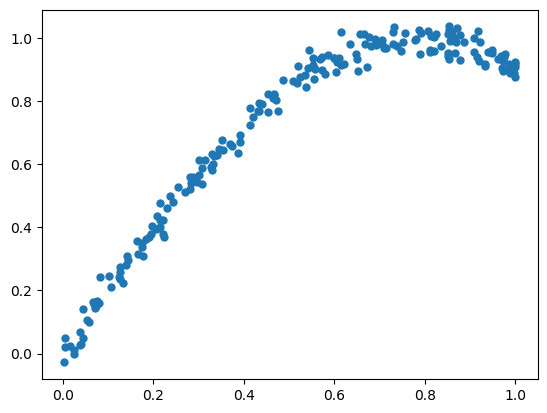

In [29]:
# generate synthetic data
Random.seed!(3)
n = 200
X = rand(n,1)
y = broadcast(sin,2 .*X[:,1]) + randn(n).*0.03

plt.figure()
plt.plot(X,y,".",markersize=10);

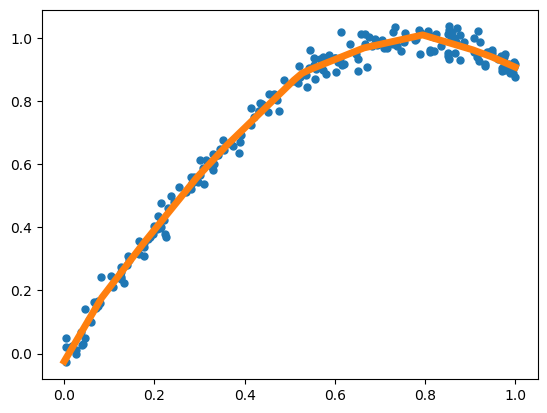

In [33]:
nn = SkNeural.MLPRegressor(solver="lbfgs")
nn.fit(X,y);

plt.plot(X,y,".",markersize=10);
grid = reshape(range(0,stop=1,length=1000),1000,1)

plt.plot(grid, nn.predict(grid),linewidth=5);

#### random weights

To build intuition about the types of functions we can represent, let's explore what happens with random weights using different architectures. Again, this is all within the confines of $\mathbb{R}\rightarrow\mathbb{R}$ which isn't the real deal.


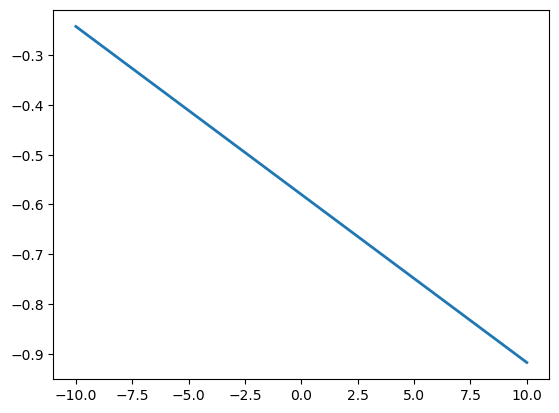

C:\Users\jasonsyc.STUDENTS.000\.julia\conda\3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [35]:
nn = SkNeural.MLPRegressor(hidden_layer_sizes=(), activation="logistic", max_iter=1)

# change hidden_layer_sizes to, e.g. 10,
# change activation to relu

nn.fit(zeros(1,1),[0])
grid = reshape(range(-10,stop=10,length=1000),1000,1)
plt.plot(grid, nn.predict(grid),linewidth=2);

Regression example with $d=2$ (again, change hidden layer sizes and nonlinearity)

In [50]:
nn = SkNeural.MLPRegressor(hidden_layer_sizes=(), max_iter=1)

nn.fit(zeros(1,2),[0])

ngrid = 20
X = repeat(range(-5, stop=5, length=ngrid)',ngrid,1)
Y = repeat(range(-5, stop=5, length=ngrid),1,ngrid)

inputs = hcat(X'[:], Y'[:])
outputs = nn.predict(inputs)
Z = reshape(outputs, ngrid, ngrid)

# Plot the surface.
pygui(true)
PyPlot.surf(X,Y,Z,antialiased=false,cmap=ColorMap("coolwarm"))
# surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, linewidth=0, antialiased=false)

C:\Users\jasonsyc.STUDENTS.000\.julia\conda\3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


PyObject <mpl_toolkits.mplot3d.art3d.Poly3DCollection object at 0x000000003BB7C588>

### Some deep learning software

There's been a lot of software released lately to take care of this for you. Some big players are:

| Name   |  Host language  | Released |
|--------|-------------|---------------|
| [Torch](http://torch.ch) | Lua | 2002 |
| [Theano](http://deeplearning.net/software/theano/) | Python | 2007 |
| [Caffe](http://caffe.berkeleyvision.org) | Executable with Python wrapper | 2014 |
| [TensorFlow](https://www.tensorflow.org) | Python | 2015 |
| [Keras](https://keras.io) | Python | 2015 |
| [PyTorch](http://pytorch.org) | Python | 2017 |
| [Caffe 2](https://caffe2.ai/) | Python or C++ | 2017 |

There are many others. See for example [Comparison of deep learning software](https://en.wikipedia.org/wiki/Comparison_of_deep_learning_software).

#### Repeating the examples above in Keras

In [53]:
#=
using Conda
Conda.add("keras")
=#
KerasModels = pyimport("keras.models") #import Sequential # pip install keras
KerasLayers = pyimport("keras.layers") #import Dense
Keras = pyimport("keras")

┌ Info: Running `conda install -y keras` in root environment
└ @ Conda C:\Users\jasonsyc.STUDENTS.000\.julia\packages\Conda\kLXeC\src\Conda.jl:112


Solving environment: ...working... failed with current_repodata.json, will retry with next repodata source.
Initial quick solve with frozen env failed.  Unfreezing env and trying again.
Solving environment: ...working... failed with current_repodata.json, will retry with next repodata source.
Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\jasonsyc.STUDENTS.000\.julia\conda\3

  added / updated specs:
    - keras


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _tflow_select-2.3.0        |              mkl           3 KB
    absl-py-0.7.1              |           py36_0         158 KB
    astor-0.7.1                |           py36_0          44 KB
    certifi-2019.6.16          |           py36_1         156 KB
    gast-0.2.2                 |           py36_0         155 KB
    grpcio-1.16.1              |   py36h351948d_1         849 KB
 

Using TensorFlow backend.


PyObject <module 'keras' from 'C:\\Users\\jasonsyc.STUDENTS.000\\.julia\\conda\\3\\lib\\site-packages\\keras\\__init__.py'>

In [55]:
# generate fake data
Random.seed!(5)
N = 200
X = rand(N,1)
y = broadcast(sin,2 .*X) + randn(N,1).*0.03;

In [57]:
model = KerasModels.Sequential()
model.add(KerasLayers.Dense(10, input_dim=1, activation="tanh", kernel_initializer="lecun_uniform",))
model.add(KerasLayers.Dense(1, activation="linear", kernel_initializer="lecun_uniform",))

# Compile model
sgd = Keras.optimizers.SGD(lr=0.1, momentum=0.0, decay=0.0, nesterov=false)
model.compile(loss="mean_squared_error", optimizer=sgd)#'adam')

# Fit the model
loss=model.evaluate(X, y,verbose=0)
println(loss)
model.fit(X, y, epochs=1000, verbose=0)

# evaluate the model
loss=model.evaluate(X, y,verbose=0)
println(loss)

3.2892346668243406


2019-08-01 09:03:17.655119: I tensorflow/core/platform/cpu_feature_guard.cc:141] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX
2019-08-01 09:03:17.657422: I tensorflow/core/common_runtime/process_util.cc:71] Creating new thread pool with default inter op setting: 4. Tune using inter_op_parallelism_threads for best performance.


Instructions for updating:
Use tf.cast instead.
0.001157178720459342


- Note that no code is executed in the first few lines.
- This is a new paradigm that we're not exactly used to.

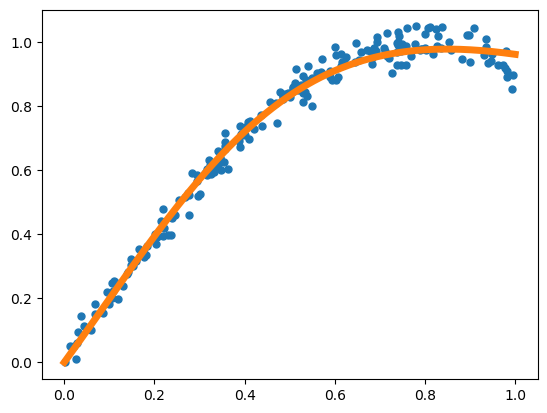

In [60]:
pygui(false)
plt.plot(X,y,".",markersize=10)
grid = range(0,stop=1,length=1000)
plt.plot(grid, model.predict(grid),linewidth=5);

In [66]:
# random weights
model = KerasModels.Sequential()
model.add(KerasLayers.Dense(50, input_dim=2, activation="tanh", kernel_initializer="lecun_uniform"))
model.add(KerasLayers.Dense(1, activation="linear", kernel_initializer="lecun_uniform",))
model.compile(loss="mean_squared_error", optimizer="sgd")

# fig = plt.figure()
# ax = fig.gca(projection='3d')

n = 30
X = repeat(range(-5, stop=5, length=n)',n,1)
Y = repeat(range(-5, stop=5, length=n),1,n)

inputs = hcat(X'[:], Y'[:])
outputs = model.predict(inputs)
Z = reshape(outputs, n,n)

# Plot the surface.
pygui(true)
PyPlot.surf(X,Y,Z,cmap=ColorMap("coolwarm"))


PyObject <mpl_toolkits.mplot3d.art3d.Poly3DCollection object at 0x000000003EA87898>

### How many parameters do we have?

Just the weight matrices: $$dk_1 + k_1k_2 + \ldots + k_{L-1}k_L + k_Lc$$

With the biases: $$(d+1)k_1 + (k_1+1)k_2 + \ldots + (k_{L-1}+1)k_L + (k_L+1)c$$

where $c$ is the dimensionality of the output.
  
**This is potentially a lot of parameters!!!!**